#### Background:
Banks often offer personal loans to eligible customers. Predicting which customers are more likely to accept a loan offer can optimize marketing efforts.

Data download from kaggle link : https://www.kaggle.com/datasets/santosh1974/loan-data-csv
#### Data Description:
credit.policy: Indicates if the customer meets the credit underwriting criteria of the platform (binary: 1 means the customer met the credit policy, and 0 means the customer didn't).

purpose: The purpose of the loan (e.g., "debt_consolidation", "credit_card").

int.rate: The interest rate of the loan (a rate between 0 and 1, e.g., 0.1189 corresponds to 11.89%).

installment: Monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural logarithm of the self-reported annual income of the borrower.

dti: Debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records.

not.fully.paid: Indicates if the loan was not paid back in full (binary: 1 means it was not paid back in full, and 0 means it was).

#### Machine Learning Task:
Task: Predict Loan Default
Objective: Predict whether a borrower will pay back their loan in full.

Type of Problem: Binary Classification
Target Variable: not.fully.paid
Features: All other columns (credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec).
Reasoning: This task is significant for any lending institution. Predicting the probability of a borrower defaulting can help in decision-making regarding loan approvals, determining interest rates, or setting up terms of the loan.

#### Potential Pre-processing Steps:

One-hot encoding or label encoding for the purpose column as it's a categorical variable.
Handle missing data if any (e.g., imputation).

Feature scaling for features like fico, days.with.cr.line, and revol.bal to ensure that they're on similar scales.

Feature engineering to possibly extract or combine information from existing features.

After pre-processing, various classification algorithms can be applied to the dataset, such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, Neural Networks, etc., followed by evaluation and model tuning.

In [4]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns


In [5]:
df = pd.read_csv('loan_data.csv')

In [6]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.shape

(9578, 14)

Data set has 9578 rows and 14 columns. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Data set has columns 'purpose' type object (categorical Feature) and the rest of data is Numerical Features. 

In [9]:
df.isnull().sum() #checking missing value

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Data Set dosen't have missing value. 

In [10]:
df.duplicated().sum() #Checking duplicates

0

Data dosen't have duplicates values. 

In [11]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Checking unique 

In [12]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [13]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

#### Univariate and Bivariante Features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


In [16]:
numeric_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                    'days.with.cr.line', 'revol.bal', 'revol.util']

In [17]:
import matplotlib.pyplot as plt

In [33]:
def box_histogram_plots(df, feature): 
    
    fig, ax = plt.subplots (2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, figsize=(12, 6))
    
    sns.boxplot(data = df, x = feature, showmeans = True, color = "violet", ax=ax[0])
    sns.histplot(data = df, x = feature, ax = ax[1])
    

    ax[1].axvline(df[feature].mean(), linestyle = "--")

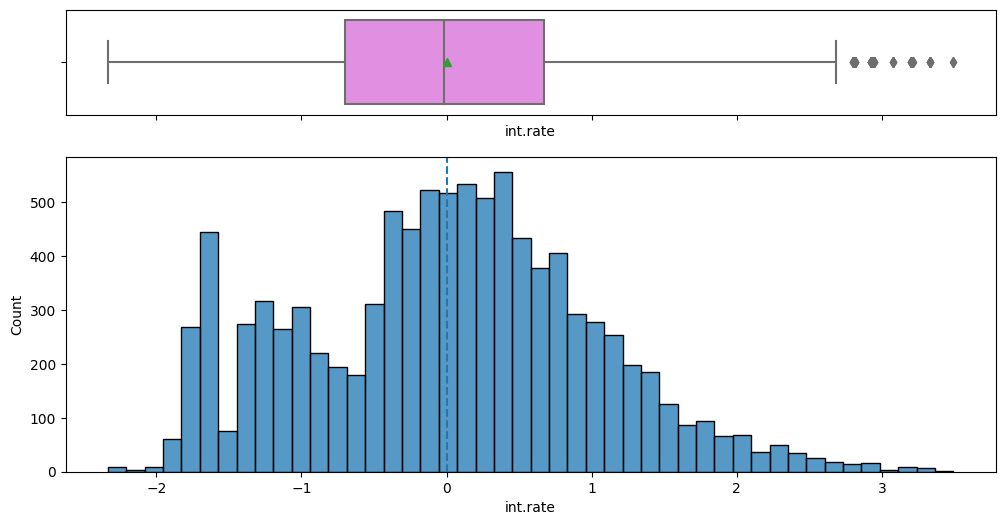

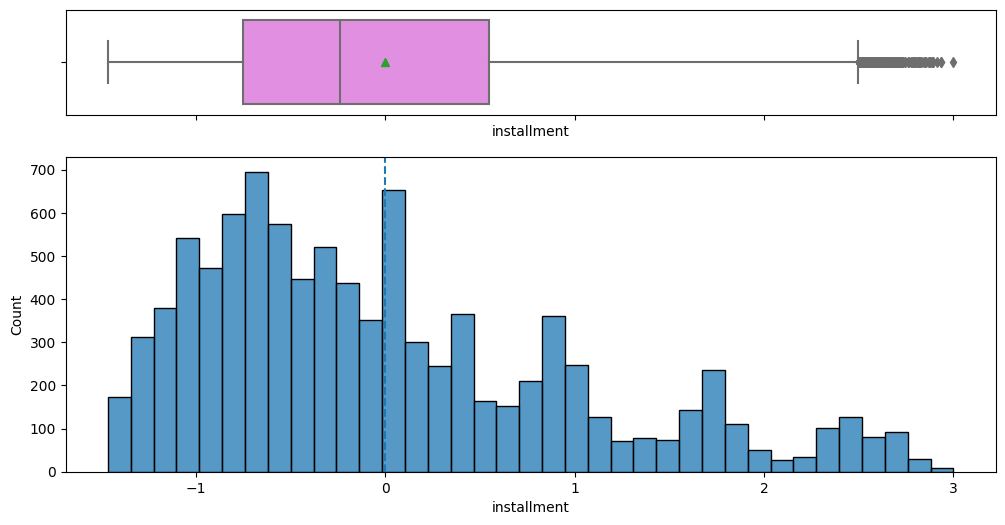

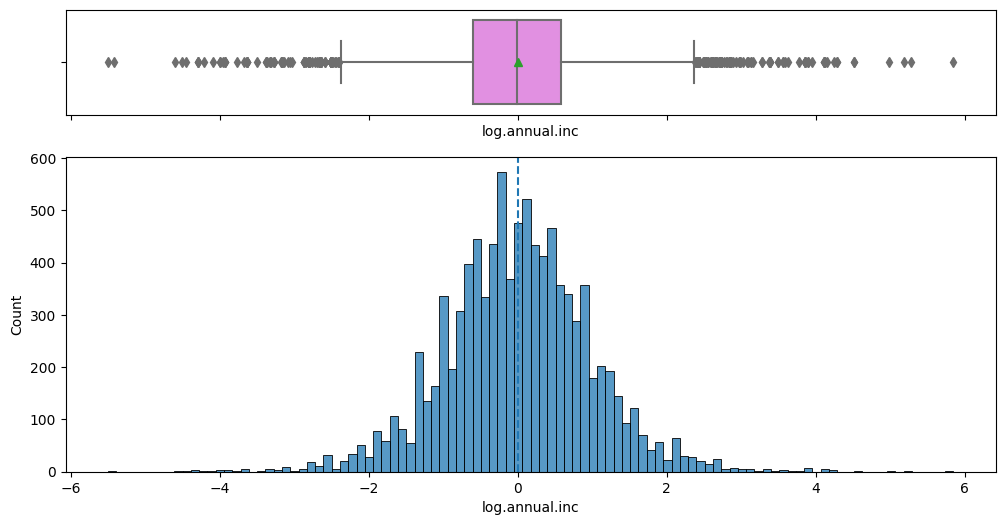

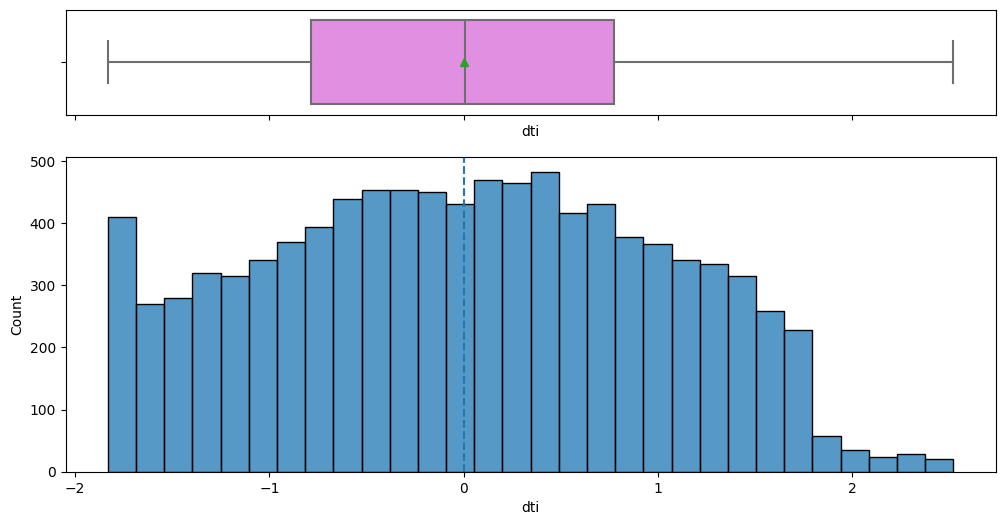

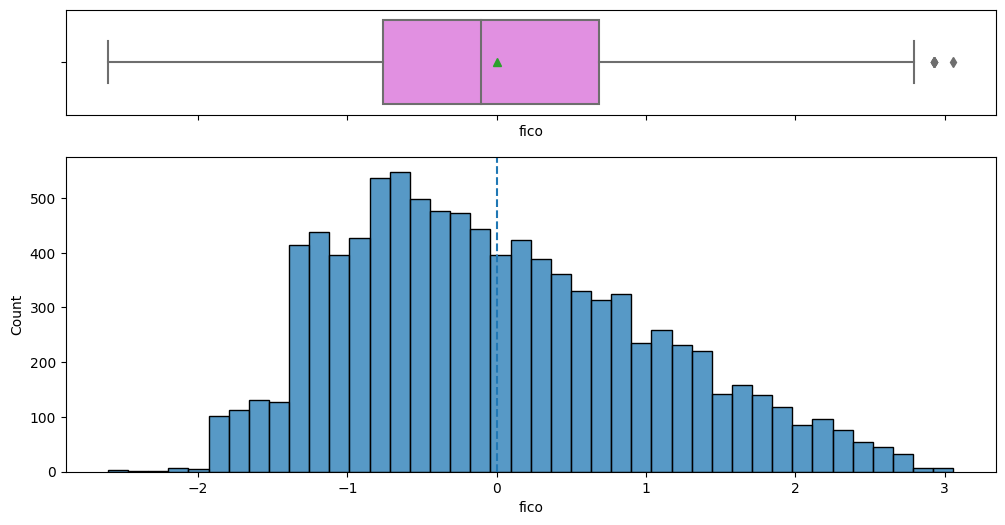

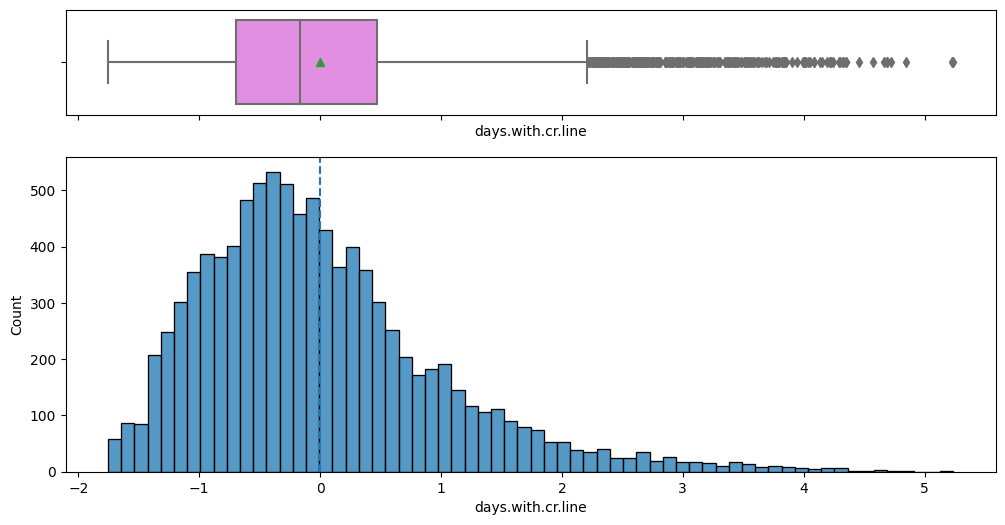

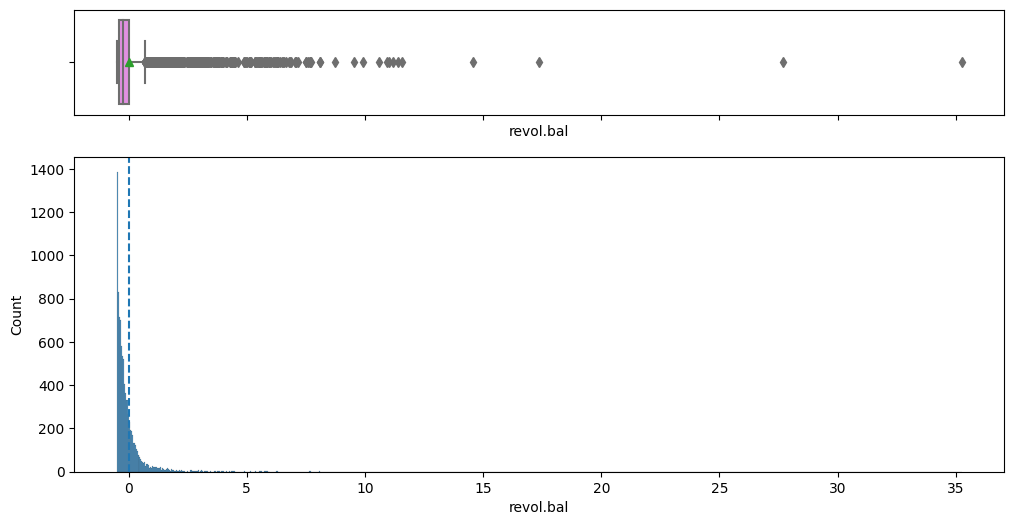

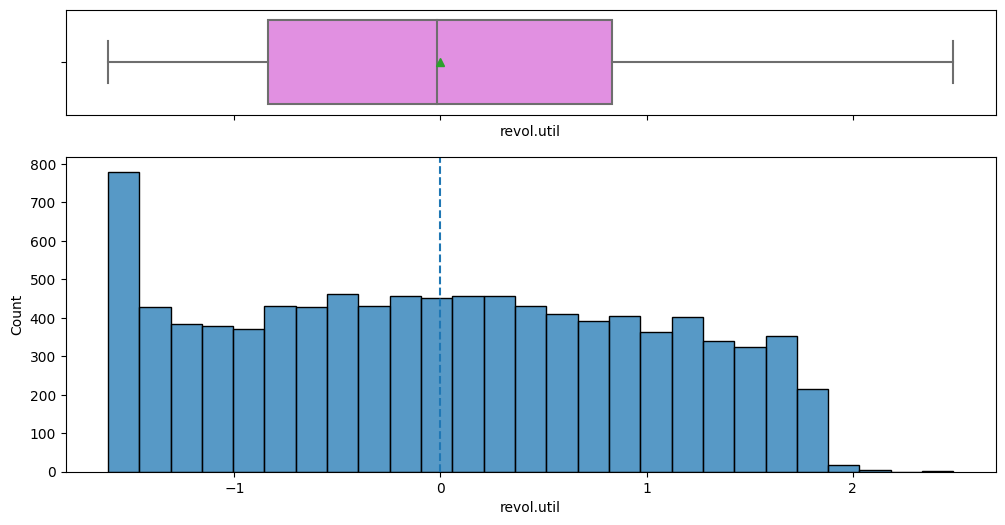

In [63]:
for features in numeric_features:
    box_histogram_plots(df,features)
     


### Univariate and Bivariante Analysis - Ctegorical Features

In [25]:
categorical_features = ['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


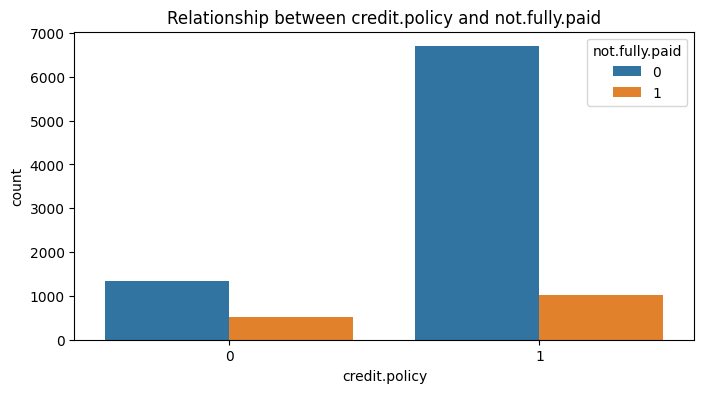

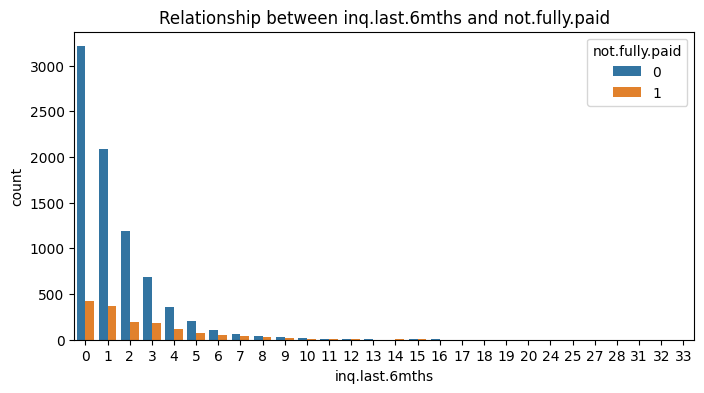

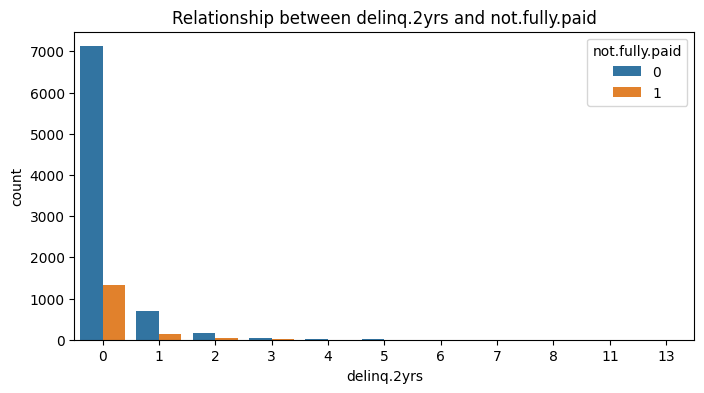

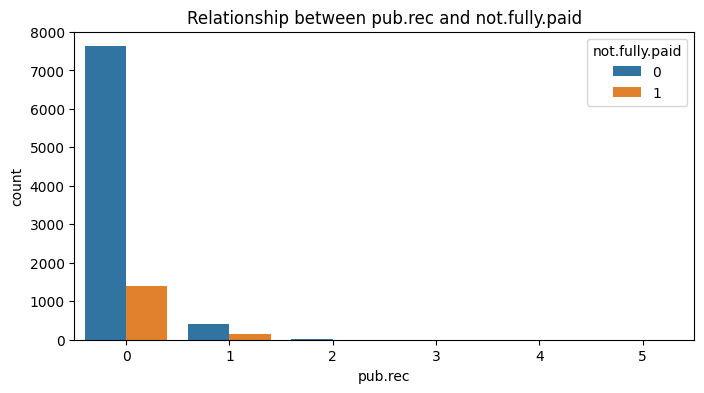

In [26]:
for feature in categorical_features:
    if feature != 'not.fully.paid':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, hue='not.fully.paid', data=df)
        plt.title(f"Relationship between {feature} and not.fully.paid")
        plt.show()

### Preprocessing

#### Loading Modules For Perfoming ML

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
# One-hot encoding for 'purpose' - converting categorilac feature 
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['purpose']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['purpose']))
df = pd.concat([df.drop('purpose', axis=1), encoded_df], axis=1)


c:\Users\Tania\OneDrive\Documents\Project DEVELOPMENT\Loan_Data_ML\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


#### Scaling Data:

In [53]:
 scaler = StandardScaler()
columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
df[columns] = scaler.fit_transform(df[columns])

In [54]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


### Split data into test and train sets:

In [56]:
X = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Train a Logistic Regression model: 

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
predictions = model.predict(X_test)

In [62]:
#Evaluete the model: 

accuracy = accuracy_score (y_test, predictions)
accuracy

0.8397703549060542

#### Conclusions:
1)  Baseline Performance: The LogisticRegression() model achieved an accuracy of approximately 83.98 % on the task of predicting loan defaults. This suggests that the model is able to correctly predict the repayment behavior of the borrowers for a majority of the cases.

2)  Reliability in Decision Making: Given a task of significant financial implications such as predicting loan defaults, an accuracy of 
83.98% provides a strong foundation for making lending decisions. The model can be used as a tool to aid human decision-makers in assessing loan applications.

3)  Risk Assessment: While the model's accuracy is commendable, the 16.02% error indicates potential risks. Lenders should consider the cost implications of false positives (incorrectly predicting that a loan won't default when it will) versus false negatives (predicting a loan will default when it won't). The financial implications of both types of errors can differ, and understanding this can help in decision-making.

4)  Business Implications: Successfully predicting loan defaults can lead to significant savings for financial institutions. It reduces potential bad loans, improves resource allocation, and can enhance the institution's reputation.


#### Improvement Scope: 
Even though 83.98% is a strong starting point, there might be room for further optimization. This can be achieved through additional feature engineering, trying more sophisticated models, or fine-tuning hyperparameters.
